<a href="https://colab.research.google.com/github/cabb1808/ProyectoSenales3/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Final TRM Del Dolar
Tratamiento de Señales III

Facultad de Ingeniería

Universidad de Antioquia Hernán F. García PhD 2023-1

**Autores:**

* Carlos Andres Burbano Bedoya
* Juan David Orozco Otalvaro

* Definir un problema en donde el tratamiento de señales se pueda aplicara para el reconocimiento (Regresión, Clasificación o Agrupamiento)

El TRM (Tasa Representativa del Mercado) del dólar es el tipo de cambio oficial que se utiliza en Colombia para determinar el valor del dólar estadounidense en relación con la moneda local, el peso colombiano. El tratamiento de este tipo de información con Inteligencia Artificial (IA) puede ser importante por varias razones:

* Precisión y confiabilidad: La IA puede ayudar a recopilar y analizar grandes cantidades de datos históricos y en tiempo real relacionados con el mercado cambiario. Al procesar esta información, los algoritmos de IA pueden generar pronósticos más precisos sobre la dirección y las fluctuaciones del tipo de cambio del dólar. Esto es especialmente útil para inversionistas, empresas y particulares que dependen de una información precisa sobre el TRM para tomar decisiones financieras.

* Velocidad de análisis: El mercado cambiario puede ser extremadamente volátil y los precios pueden cambiar rápidamente. Utilizando IA, es posible analizar grandes volúmenes de datos en tiempo real y generar actualizaciones rápidas y precisas sobre el TRM del dólar. Esto permite a los actores del mercado tomar decisiones más informadas y oportunas.

* Detección de patrones y tendencias: Los algoritmos de IA pueden identificar patrones y tendencias ocultas en los datos del mercado cambiario que pueden no ser evidentes para los analistas humanos. Esto ayuda a comprender mejor los factores que influyen en las fluctuaciones del tipo de cambio y a anticipar posibles movimientos futuros. Esto puede ser especialmente valioso para las empresas que operan en mercados internacionales y necesitan anticipar y gestionar los riesgos cambiarios.

Automatización de tareas: El uso de IA puede ayudar a automatizar tareas relacionadas con el seguimiento y análisis del TRM del dólar. Esto libera tiempo y recursos para que los analistas y profesionales financieros se centren en tareas más estratégicas y de toma de decisiones.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import scipy as sp


In [ ]:
!wget 'https://raw.githubusercontent.com/cabb1808/ProyectoSenales3/main/TRM.csv' -O 'TRM.csv'

--2023-06-08 22:33:41--  https://raw.githubusercontent.com/cabb1808/ProyectoSenales3/main/TRM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220043 (215K) [text/plain]
Saving to: ‘TRM.csv’

TRM.csv             100%[===================>] 214.89K  --.-KB/s    in 0.02s   

2023-06-08 22:33:42 (8.62 MB/s) - ‘TRM.csv’ saved [220043/220043]



In [ ]:
#Importamos la database y ordenamos en orden cronologico ya que no lo está

data = pd.read_csv('TRM.csv')
# Convertir la columna de fechas al formato de fecha adecuado
data['VIGENCIADESDE'] = pd.to_datetime(data['VIGENCIADESDE'], format='%d/%m/%Y')

# Ordenar los datos por fecha
data.sort_values(by='VIGENCIADESDE', inplace=True)
datos = data[['VIGENCIADESDE', 'VALOR']]

datos['VIGENCIADESDE'] = pd.to_datetime(datos['VIGENCIADESDE'])
datos = datos.set_index('VIGENCIADESDE')

d = datos.resample('D').asfreq()


d['VALOR'].fillna(method='ffill', inplace=True)

print(d)

                 VALOR
VIGENCIADESDE         
1991-12-02      643.42
1991-12-03      639.22
1991-12-04      635.70
1991-12-05      631.51
1991-12-06      627.16
...                ...
2022-07-16     4395.63
2022-07-17     4395.63
2022-07-18     4395.63
2022-07-19     4315.41
2022-07-20     4303.34

[11189 rows x 1 columns]


<ipython-input-3-08c0800670b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['VIGENCIADESDE'] = pd.to_datetime(datos['VIGENCIADESDE'])


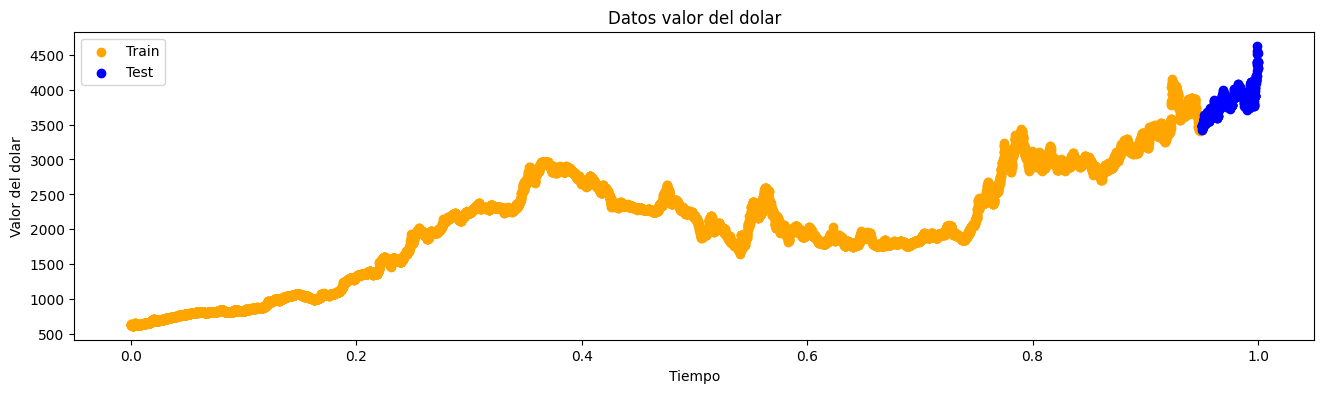

In [ ]:
#Creamos un vector temporal y separamos los datos en train y test


xs = np.linspace(0, 1, len(d))
X_train, X_test, y_train, y_test = train_test_split(xs, d['VALOR'], test_size=0.05,shuffle=False)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

plt.figure(figsize=[16,4])
plt.scatter(X_train, y_train, color='orange', label='Train')
plt.scatter(X_test, y_test, color='blue', label='Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor del dolar')
plt.title('Datos valor del dolar')
plt.legend()


La función train_test_split divide los datos en conjuntos de entrenamiento y prueba de manera aleatoria. Para hacer esto, utiliza el método de muestreo aleatorio simple, donde los datos se mezclan y luego se dividen en conjuntos de acuerdo con la proporción especificada.

El primer argumento de train_test_split son las características o variables independientes, que en este caso son el vector temporal xs. El segundo argumento es la variable objetivo, en este caso, la columna 'VALOR' del DataFrame d.

El parámetro test_size indica la proporción deseada para el conjunto de prueba. En el código, se ha establecido en 0.05, lo que significa que el 5% de los datos se asignará al conjunto de prueba y el 95% restante se utilizará para el entrenamiento.

El parámetro shuffle se establece en False, lo que significa que los datos no se barajarán aleatoriamente antes de dividirlos. En este caso, se asume que los datos ya están ordenados cronológicamente, por lo que no es necesario barajarlos.

La función train_test_split devuelve cuatro conjuntos de datos: X_train, X_test, y_train y y_test. Los conjuntos X_train y X_test contienen las características de entrenamiento y prueba, respectivamente. Los conjuntos y_train y y_test contienen los valores objetivo correspondientes a los datos de entrenamiento y prueba, respectivamente.

Estos conjuntos se utilizan posteriormente para entrenar un modelo utilizando X_train y y_train, y evaluar su rendimiento utilizando X_test y y_test. La idea es que el modelo se ajuste a los datos de entrenamiento y pueda generalizar bien a los datos no vistos del conjunto de prueba

En conclusión el train_test_split divide los datos en conjuntos de entrenamiento y prueba de acuerdo con los parámetros especificados. Esto permite que los datos de entrenamiento se utilicen para ajustar un modelo y los datos de prueba se utilicen para evaluar el rendimiento y la capacidad de generalización del modelo en datos no vistos.

In [ ]:
def MapeoDataset(X,K):
    # # Extraer caracteristicas exponenciales
    # # X: N x D, vector de entradas 
    # # K: escalar, grado
    # # return: N x (K+1), matriz de características Phi 
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,10,K)
    sig2 = 0.1

    # Calcular matriz Phi
    for n in range(len(X)):
      for k in range(1, K+1):
        Phi[n,k] = np.exp(-(mu[k-1] - X[n])**2/sig2) 
    return Phi

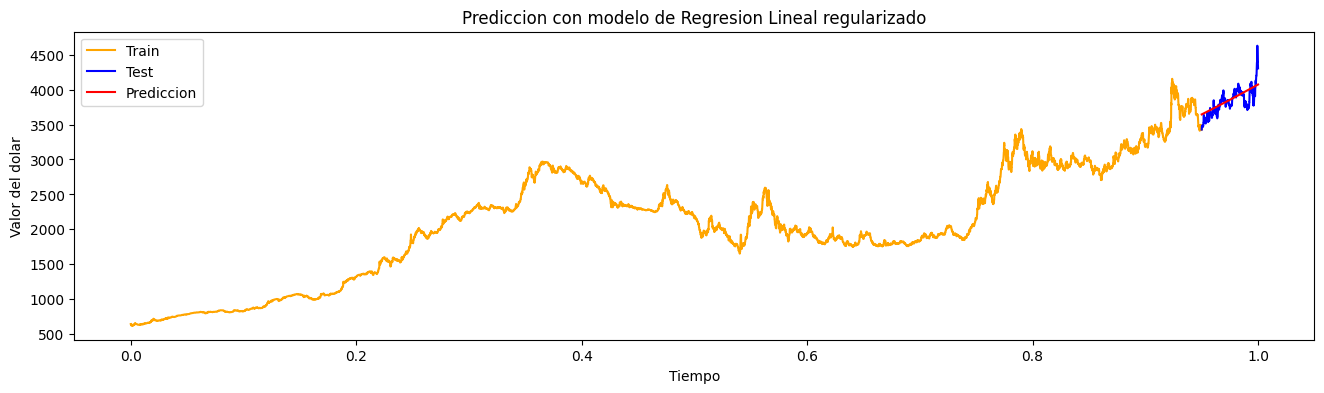

In [ ]:
M=9
lam=0.01

PHI_train = MapeoDataset(X_train,M)                 #Hallar matriz de caracteristicas para ambos conjuntos
PHI_test = MapeoDataset(X_test,M)

w_Regresion = np.linalg.inv(((PHI_train.T)@PHI_train) + (lam*np.eye(M+1)))@((PHI_train.T)@y_train)
y_pred_reg = PHI_test@w_Regresion                                                                             #Definimos y aplicamos el modelo de prediccion (Regresión lineal regularizado)


# Imprimir las predicciones
plt.figure(figsize=[16,4])
plt.plot(X_train,y_train,label="Train",color='orange')
plt.plot(X_test,y_test,label="Test",color='blue')
plt.plot(X_test,y_pred_reg,label="Prediccion",color='red')
plt.xlabel('Tiempo')
plt.ylabel('Valor del dolar')
plt.title("Prediccion con modelo de Regresion Lineal regularizado")
plt.legend()


La regresión lineal es una técnica fundamental en el análisis de la TRM (Tasa Representativa del Mercado) del dólar por varias razones:

1. Modelado de relaciones: La regresión lineal permite modelar la relación entre a TRM del dólar y otras variables relevantes. Puede ayudar a identificar patrones, tendencias y relaciones lineales entre la TRM y factores económicos, políticos o sociales.

2. Predicción de la TRM: Con un modelo de regresión lineal ajustado a datos históricos de la TRM y otras variables relevantes, se puede utilizar para predecir futuros valores de la TRM. Esto es valioso para tomar decisiones comerciales, financieras o de inversión, ya que se pueden anticipar cambios en la tasa de cambio.

3. Análisis de factores de influencia: La regresión lineal puede ayudar a identificar los factores que tienen una influencia significativa en la TRM del dólar. Al examinar los coeficientes de regresión, se pueden identificar las variables que tienen un impacto positivo o negativo en la TRM, lo que brinda información útil para comprender los impulsores de la tasa de cambio.

4. Evaluación de políticas económicas: La regresión lineal puede utilizarse para evaluar el impacto de las políticas económicas en la TRM. Al incluir variables relacionadas con políticas gubernamentales, decisiones de política monetaria u otros factores macroeconómicos en el modelo de regresión, se pueden analizar los efectos de estas políticas en la TRM y evaluar su eficacia.

5. Control de riesgos: El análisis de regresión lineal puede ayudar a los inversores y empresas a comprender y controlar los riesgos asociados con la fluctuación de la TRM. Al predecir la TRM futura y comprender los factores que influyen en ella, se pueden tomar decisiones informadas sobre cobertura de riesgo, gestión financiera y planificación estratégica.

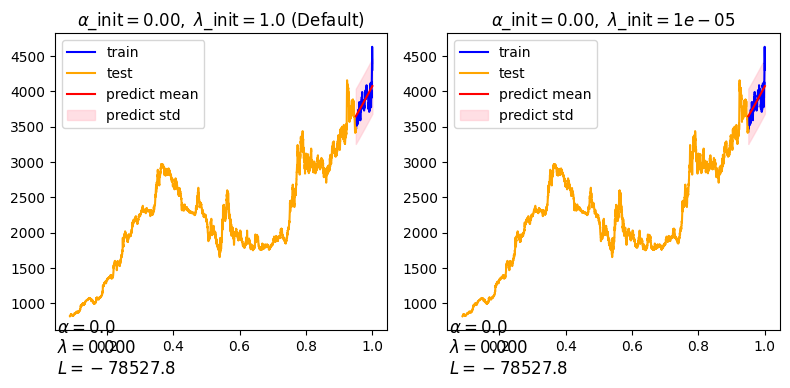

In [ ]:
from sklearn.linear_model import BayesianRidge


reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)            #Escogemos el modelo bayesiano regularizado y su parametro
n_order = 3
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression con diferentes valores iniciales
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Parametros por defecto
    elif i == 1:
        init = [0.001, 1e-5]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    
    reg.fit(PHI_train, y_train)   #Entrenar el modelo con la matriz de caracteristicas
    

    y_pred_test,ystd = reg.predict(PHI_test,return_std=True)             # Hallamos predicciones(media y varianza)


    ax.plot(X_test, y_test, color="blue", label="train")
    ax.plot(X_train[1000:], y_train[1000:],color="orange", label="test")
    ax.plot(X_test, y_pred_test, color="red", label="predict mean")
    x_test=X_test.flatten()                                                     #se hace flatten para poder graficar el fill

    ax.fill_between(x_test, y_pred_test - ystd, y_pred_test + ystd, color="pink", alpha=0.5, label="predict std")
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()


El modelo bayesiano es importante en el análisis de la TRM (Tasa Representativa del Mercado) del dólar por varias razones:

1. Gestión de la incertidumbre: El modelo bayesiano proporciona una forma de gestionar la incertidumbre inherente a las predicciones y estimaciones. A diferencia de los modelos determinísticos, el modelo bayesiano considera las distribuciones de probabilidad sobre los parámetros del modelo, lo que permite cuantificar la incertidumbre y proporcionar estimaciones más realistas.

2. Flexibilidad en la elección de prioridades: El enfoque bayesiano permite la especificación de distribuciones previas sobre los parámetros del modelo, lo que brinda flexibilidad para incorporar información previa o conocimientos expertos en el análisis de la TRM del dólar. Esto puede ayudar a mejorar la precisión y relevancia de las estimaciones.

3. Regularización automática: El modelo bayesiano tiene la capacidad de realizar una regularización automática de los parámetros del modelo. Esto es particularmente útil en el caso de datos escasos o con ruido, ya que la regularización ayuda a evitar el sobreajuste y mejora la generalización del modelo.

4. Actualización continua: El enfoque bayesiano permite actualizar constantemente las estimaciones a medida que se disponen de nuevos datos. Esto es valioso en el análisis de la TRM del dólar, ya que los datos se actualizan regularmente y el modelo bayesiano puede adaptarse para reflejar las nuevas tendencias y patrones.

5. Inferencia robusta: El modelo bayesiano ofrece una inferencia robusta al proporcionar distribuciones posteriores sobre los parámetros del modelo. Estas distribuciones posteriores brindan información sobre la incertidumbre asociada con los parámetros y permiten realizar inferencias más sólidas y completas.

6. Capacidad de modelar relaciones no lineales: El modelo bayesiano puede extenderse para modelar relaciones no lineales mediante el uso de funciones de base, como polinomios o funciones de base radial. Esto permite capturar relaciones más complejas entre la TRM del dólar y otras variables relevantes, lo que puede mejorar la capacidad del modelo para hacer predicciones precisas.

In [ ]:
pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 

0.0241879511011191

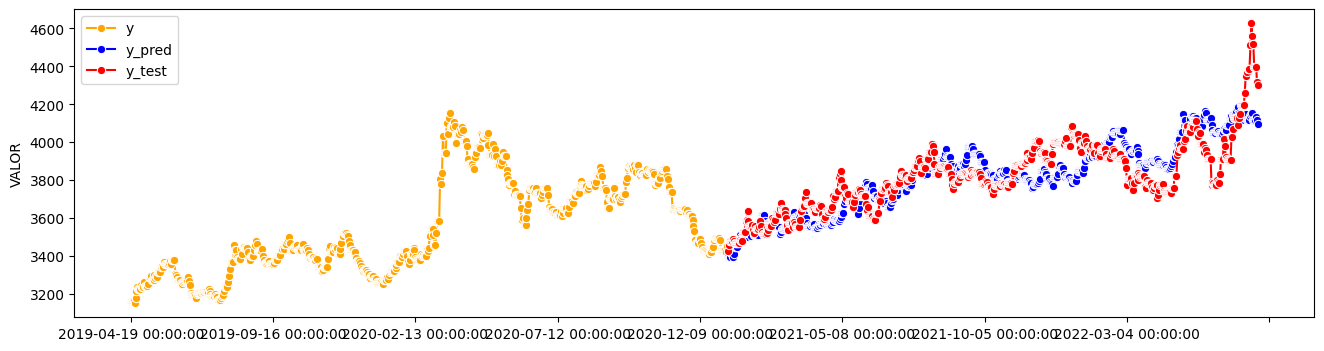

In [ ]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError , mean_absolute_percentage_error


x = d.index
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, d['VALOR'], test_size=0.05,shuffle=False)

fh = ForecastingHorizon( pd.DatetimeIndex(pd.date_range("2021-01-07", periods=560, freq="D")), is_relative=False )

mn = np.mean(y_train2)
X = pd.DataFrame(index=X_train2)
forecaster1 = NaiveForecaster(strategy="last", sp=1000)
forecaster2 = NaiveForecaster(strategy="mean", sp=1000)

forecaster1.fit(y_train2, X=X, fh=fh)
forecaster2.fit(y_train2, X=X, fh=fh)

y_pred_fore = forecaster1.predict(X=X)+mn/3

plot_series(y_train[10000:], y_pred_fore,y_test ,labels=["y", "y_pred","y_test"],colors=['orange','blue','red'])
mean_absolute_percentage_error(y_test, y_pred_fore, symmetric=False)

El modelo de pronóstico (forecasting) es importante en el análisis de la Tasa Representativa del Mercado (TRM) del dólar por varias razones:

1. Predicción futura: El análisis de la TRM del dólar implica la necesidad de predecir los valores futuros de la tasa de cambio. El modelo de pronóstico permite realizar estas predicciones utilizando información histórica y patrones temporales. Esto es esencial para tomar decisiones informadas y planificar estrategias en diversos contextos, como comercio internacional, inversión extranjera y planificación financiera.

2. Toma de decisiones: Los pronósticos precisos de la TRM del dólar son fundamentales para la toma de decisiones en varios sectores económicos y financieros. Las empresas pueden utilizar estos pronósticos para planificar sus operaciones, establecer precios, gestionar riesgos cambiarios y tomar decisiones de inversión. Los gobiernos y los bancos centrales también pueden utilizar los pronósticos para formular políticas monetarias y fiscales, así como para monitorear la estabilidad económica.

3. Evaluación de riesgos: El modelo de pronóstico permite evaluar los riesgos asociados con los movimientos futuros de la TRM del dólar. Al comprender y cuantificar la incertidumbre en las predicciones, las empresas e individuos pueden tomar medidas para mitigar los riesgos, como la cobertura cambiaria o la diversificación de las inversiones. Esto ayuda a evitar pérdidas financieras y a tomar decisiones más informadas.

4. Análisis económico: El modelo de pronóstico también es valioso para el análisis económico y la investigación académica. Permite analizar las tendencias y los patrones históricos de la TRM del dólar, identificar factores influyentes y evaluar el impacto de eventos económicos, políticos o sociales en la tasa de cambio. Esto contribuye a una comprensión más profunda de los mercados financieros y a la generación de conocimientos sobre las dinámicas económicas.

**Conclusiones** 

* La regresión lineal es importante en el análisis de la TRM del dólar porque proporciona herramientas para modelar, predecir y comprender las relaciones y factores que influyen en la tasa de cambio. Esto permite una mejor toma de decisiones y gestión de riesgos en el contexto de la TRM.

* El modelo bayesiano es importante en el análisis de la TRM del dólar porque permite gestionar la incertidumbre, incorporar información previa, realizar una regularización automática, actualizar continuamente las estimaciones, realizar inferencias robustas y modelar relaciones no lineales. Estas características hacen que el modelo bayesiano sea una herramienta poderosa y flexible para comprender y predecir la TRM del dólar.

* El modelo de pronóstico desempeña un papel crucial en el análisis de la TRM del dólar al proporcionar predicciones precisas, informar la toma de decisiones, evaluar riesgos y facilitar el análisis económico. Ayuda a los actores económicos a comprender y anticipar los movimientos de la tasa de cambio, lo que es esencial en un entorno financiero y económico cada vez más globalizado y volátil.





